# **Lezione 1**

### **Esercizio 1.1**
In questi primi esercizi abbiamo preso familiarità con il generatore di numeri pseudo-casuali scaricato dall'ariel del corso. La richiesta era di generare un ampio set di numeri casuali $r \in [0,1)$ e:

1. calcolare la media $\langle r \rangle = \int_0^1 r dr = 1/2$ con il corrispettivo errore, ossia la deviazione standard della media per la stima di $\langle r \rangle$

2. calcolare la varianza $\sigma^2 = \int_0^1(r-\langle r \rangle)^2dr=1/12$ con il suo errore, ossia la deviazione standard della media per la stima di $\langle (r-\langle r \rangle)^2 \rangle$

3. dividere $[0,1)$ in $M$ sottointervalli identici e implementare il test del $\chi^2$. Il numero di eventi attesi osservati in ciascun sottointervallo dopo $n$ lanci, secondo una distribuzione uniforme, è  $ np=n\times 1/M$. Fissato $M=100$  e usare $n$ per i primi $10^4$ numeri pseudo-casuali, poi per i prossimi $10^4$ numeri, ... 100 volte. Tracciare poi un grafico di $\chi_j^2$ per $j=1,...,100$. in questo caso il chi-quadro è:
$$ \chi^2 = \sum_{i=1}^M \frac{(n_i-n/M)^2}{n/M} \approx 100$$


##### **Calcolo della media e della varianza**   
Lo scopo è quello di calcolare la media e la varianza di una distribuzione uniforme $[0,1)$ attraverso la tecnica del data blocking, che permette di stimare le incertezze riducendo la correlazione tra i dati. 

Nel ciclo principale, per ogni blocco $i=1,...,N=100$, genero $L=1000$ numeri casuali usando il generatore `rnd.Rannyu()`, e calcolo:
* la media dei numeri generati nel blocco ${\langle r \rangle}_i$
* il quadrato della media 
* la varianza del blocco, rispetto al valore atteso ${{\langle (r-1/2)^2 \rangle}}_i$
* il quadrato della varianza
Raccolti i dati per tutti i blocchi procedo al calcolo delle medie progressive, ossia le medie delle prime $i+1$ medie di blocco: 
$$ 
\overline{ X}_i = \frac{1}{i+1} \sum_{j=0}^i{\langle r \rangle}_j
$$
Per stimare l'incertezza statistica (errore standard) associata alla media e alla varianza progressiva, uso la formula:
$$ 
{\sigma}_i = \sqrt{\frac{\overline{ X^2}_i - \overline{ X}_i^2}{i+1} }
$$
con $\overline{ X^2}_i$ la media dei quadrati. Analogamente ripeto i calcoli per le varianze, per osservare la convergenza statistica anche di questa.

Seguentemene riporto proprio il grafico che mostra la convergenza di media e varianza, con corrispettivi errori, verso i valori aspettati (linee rosse):
$$
\langle r \rangle = \frac{1}{2} \hspace{1cm} \sigma^2= \frac{1}{12}
$$

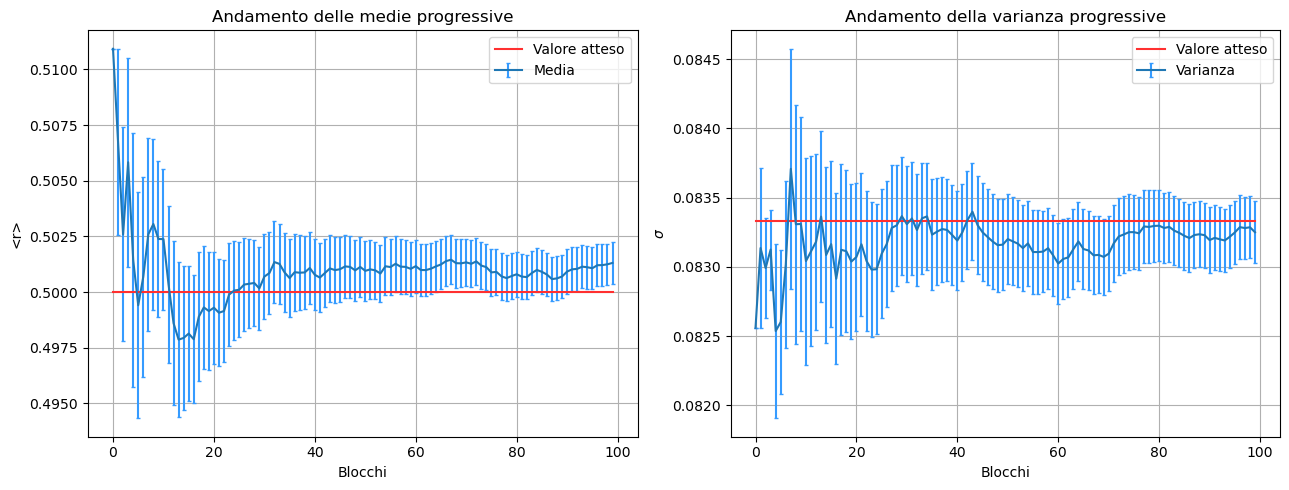

In [1]:
import matplotlib.pyplot as plt
import numpy as np

blocchi=100
x = np.arange(blocchi)

av, err, var, stdev = np.loadtxt("Files/data.dat", usecols=(0,1,2,3), delimiter='\t', unpack='True')
av_exp = np.full_like(x, 0.5, dtype=float)
var_exp = np.full_like(x, 1/12, dtype=float)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13, 5))
axes[0].errorbar(x,av,yerr=err, ecolor='#359BFF', capsize=1.5, label="Media")
axes[0].plot(x, av_exp, color="#FF3030",linestyle='-', label="Valore atteso")
axes[0].set_title('Andamento delle medie progressive')
axes[0].set_xlabel('Blocchi')
axes[0].set_ylabel("<r>")
axes[0].legend()
axes[0].grid(True)

axes[1].errorbar(x,var,yerr=stdev, ecolor='#359BFF', capsize=1.5, label="Varianza")
axes[1].set_title('Andamento della varianza progressive')
axes[1].plot(x, var_exp, color="#FF3030",linestyle='-', label="Valore atteso")
axes[1].set_xlabel('Blocchi')
axes[1].set_ylabel(r"$\sigma$")
axes[1].legend()
axes[1].grid(True)
plt.tight_layout()
plt.show()

##### **Test del chi-quadro**
Successivamente, il programma calcola anche il test del chi-quadro per verificare l'accuratezza della distribuzione uniforme. Fisso un numero di intervalli $M=100$ e genero $n=10^4$ numeri casuali, contando quante cadono in ciascun intervallo. Il valore atteso per ciascun intervallo è $n/M$. Il test del chi-quadro viene quindi calcolato con la formula: 
$$ \chi^2 = \sum_{i=1}^M \frac{(n_i-n/M)^2}{n/M}$$

Di seguito riporto i grafici ottenuti:

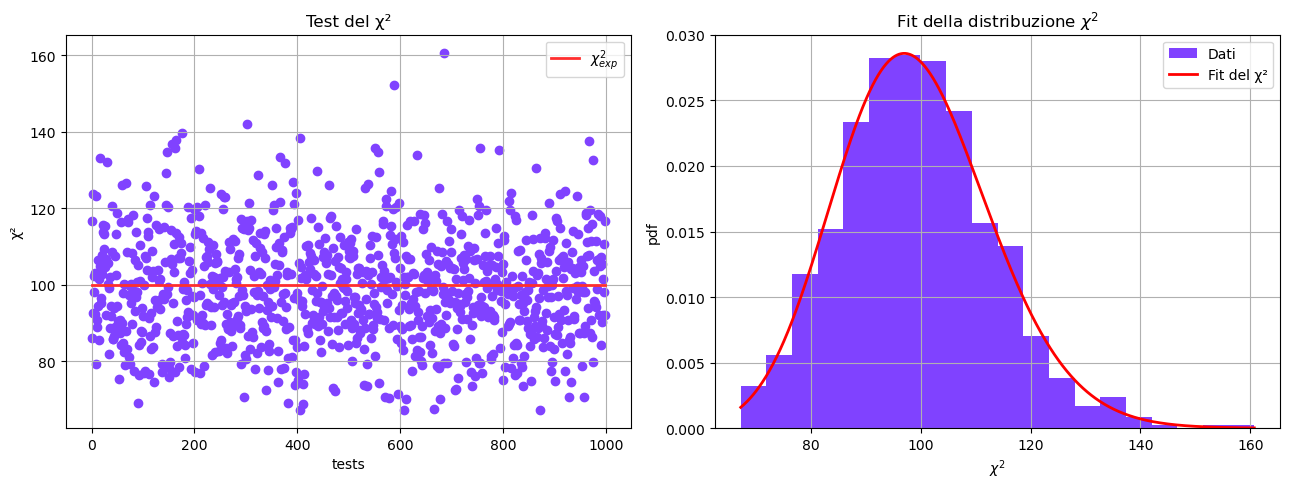

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2

# Caricamento dati
chi2_values = np.loadtxt("Files/chi2.dat", usecols=(0), delimiter='\t', unpack=True)
x = np.arange(len(chi2_values))
chi_exp = np.full_like(x, 100)
# Creazione figura
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13, 5))

# Grafico dei residui
axes[0].scatter(x, chi2_values, color='#8042FF')
axes[0].plot(x, chi_exp, color="#FF2E2E", linewidth=2, label=r'$\chi^2_{exp}$')
axes[0].set_xlabel('tests')
axes[0].set_ylabel('χ²')
axes[0].grid(True)
axes[0].set_title('Test del χ²')
axes[0].legend()

df = 100 - 1  # Gradi di libertà

# Istogramma dei dati
counts, bins, _ = axes[1].hist(chi2_values, bins=20, density=True, label='Dati', color='#8042FF')

# Fit della distribuzione chi-quadro
x_fit = np.linspace(bins[0], bins[-1], 1000) #creo da inizio bins a fine bins 100 punti in cui tracciare la funz chi2
y_fit = chi2.pdf(x_fit, df)
axes[1].plot(x_fit, y_fit, 'r-', label='Fit del χ²', linewidth=2)
axes[1].set_title(r"Fit della distribuzione $\chi^2$")
axes[1].set_xlabel(r"$\chi^2$")
axes[1].set_ylabel(r"pdf")
axes[1].legend()
axes[1].grid(True)

# Mostra il grafico
plt.tight_layout()
plt.show()

<div style="width: 48%; float: left;">

 A sinistra il grafico mostra i valori di χ² ottenuti da ciascun test fatto. Come possiamo facilmente vedere i vari tests si posizionano in maniera ordinata intorno al valore aspettato di 100, segnalato dalla linea rossa. Questa disposizione ci indica che il generatore di numeri casuali è buono e non presenta deviazioni sistematiche.
 
</div>

<div style="width: 48%; float: right;">

A destra si trova un istogramma normalizzaro ce mostra la distribuzione dei 1000 valori del $\chi^2$ calcolati. La curva rossa è il fit della distribuzione teorica con $dof = 99$. Data l'adesione dell'istogramma alla curva teorica, si può affermare che i numeri generati si distribuiscono in modo conforme alle aspettative teoriche e che il generatore che abbiamo è un buon generatore di numeri casuali.

</div>

<div style="clear: both;"></div>

### **Esercizio 1.2**
In questo esercizio useremo il generatore di numeri casuali precedentemente testato per produrre dati secondo diverse distribuzioni, al fine di esplorare il comportamento previsto dal Teorema del Limite Centrale (Central Limit Theorem, CLT).

> Il CLT afferma che, data una sequenza di variabili casuali indipendenti e identicamente distribuite con media finita e varianza finita, la distribuzione della media aritmetica di un gran numero di tali variabili tende a una distribuzione normale (gaussiana) al crescere del numero di campioni.

Nel nostro caso, testeremo il CLT su tre distribuzioni di partenza:

+ la distribuzione uniforme,

+ la distribuzione esponenziale,

+ la distribuzione di Cauchy-Lorentz.


##### **Distribuzione uniforme**
Per campionare una distribuzione uniforme in modo semplice, utilizziamo il metodo `Rannyu()` della classe `Random`, che restituisce un numero casuale uniformemente distribuito nell’intervallo $[0,1)$.


##### **Metodo della cumulativa inversa**
Il metodo della cumulativa inversa è una tecnica semplice ed efficace per generare numeri casuali secondo una distribuzione arbitraria $p(x)$, partendo da una distribuzione uniforme nell'intervallo $[0,1)$. La prima cosa da fare è costruire la funzione di distribuzione cumulativa: 
$$
F(x)=\int_{-\infty}^x p(t)dt
$$
che restituisce, per ogni valore x, la probabilità che una variabile casuale assuma un valore minore o uguale a x. Il passaggio alla distribuzione arbitraria avviene tramite l'inversione della cumulativa: basta calcolare $x=F^{-1}(y)$, con dove $y$ è un numero uniforme in $[0,1)$. Il valore ottenuto x sarà allora distribuito secondo la legge voluta.   
<b>N.B.</b> Ovviamente questo metodo risulta applicabile solo nel caso in cui la cumulativa è invertibile.


##### **Distribuzione esponenziale**
Vogliamo ora campionare una distribuzione esponenziale $p(x)=\lambda e^{-\lambda x}$. Calcoliamo dunque la sua cumulativa e invertiamola:
$$
F(x)=\int_0^xp(t)dt=1-e^{-\lambda x}=y \hspace{1.4cm} x=-\frac{1}{\lambda}\ln{(1-y)}
$$
Generando dunque $y\in[0,1)$, $x$ sarà distribuita secondo la distribuzione esponenziale. All'interno della classe `Random` ho implementato il metodo in questo modo ($\lambda=1$):
   ```cpp
        double Random :: Exponential(double lambda){
            double u=Rannyu();
            return -log(1-u)/lambda;
        }
   ```

##### **Distribuzione di Cauchy-Lorentz**
Allo stesso modo campioniamo ora la ditribuzione di Cauchy_Lorentz:  
$$ 
p(x)=\frac{1}{\pi} \frac{\Gamma}{(x-\mu)^2+\Gamma^2} 
$$
Calcoliamo ora la cumulativa e invertiamola:
$$
F(x)=\int_0^xp(t)dt=\frac{1}{\pi}\arctan\Big(\frac{x-\mu}{\Gamma}\Big)=y \hspace{1.4cm} x=\mu + \Gamma\ \tan[\pi(y-1/2)]
$$
Generando dunque $y\in[0,1)$, $x$ sarà distribuita secondo una lorentziana. All'interno della classe `Random` ho implementato il metodo in questo modo:
   ```cpp
        double Random :: Lorentz(double mean, double gamma){
            double u=Rannyu();
            return mean + gamma*tan(M_PI*(u-0.5));
        }
   ```

##### **Verifica del Teorea del Limite Centrale**

Per ogni distribuzione campionata (uniforme, esponenziale e Lorentziana), sono stati costruiti istogrammi delle medie ottenute sommando $N$ variabili indipendenti, con $N=1,2,10,100$. L’evoluzione della forma degli istogrammi mostra chiaramente gli effetti del Teorema del Limite Centrale:

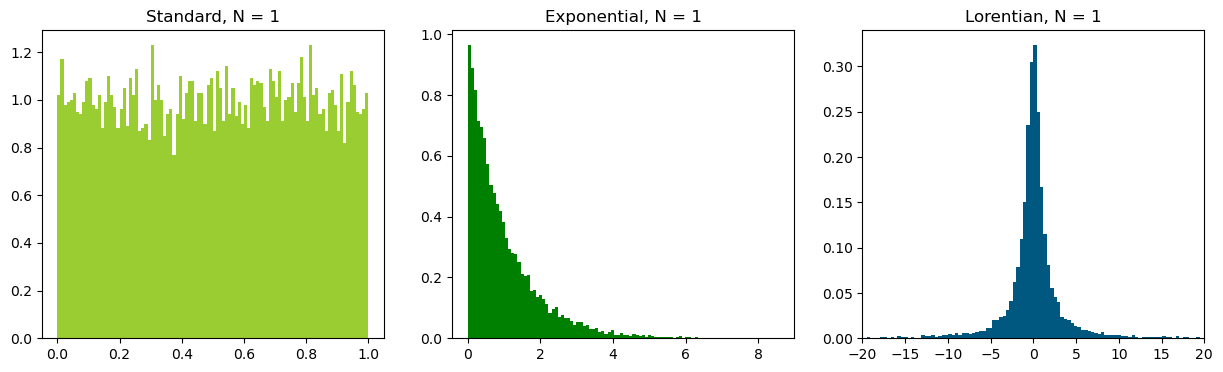

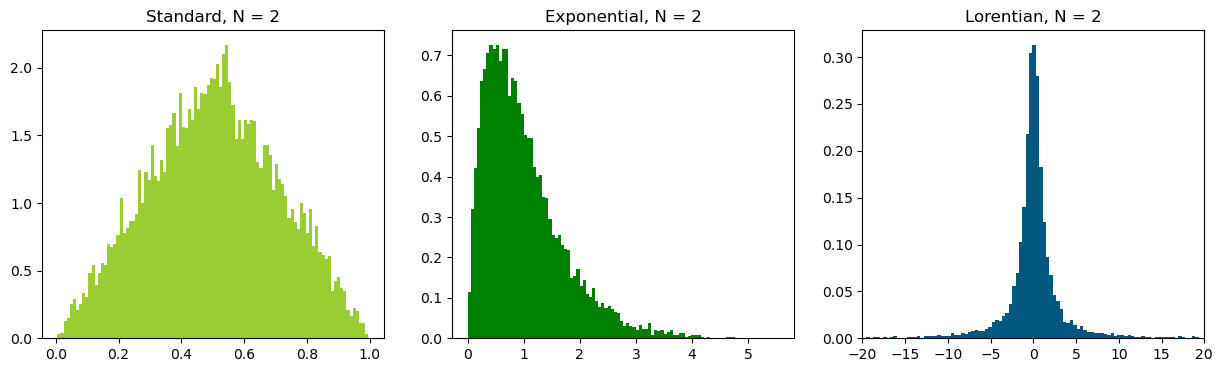

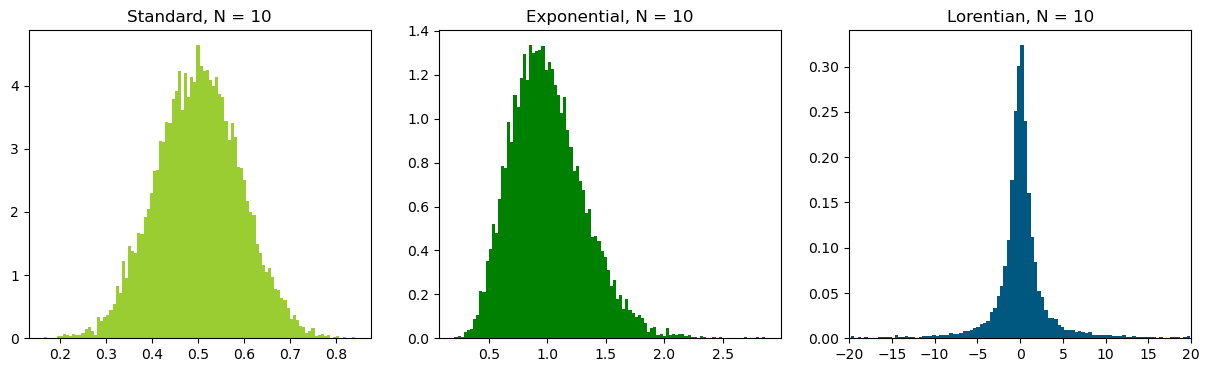

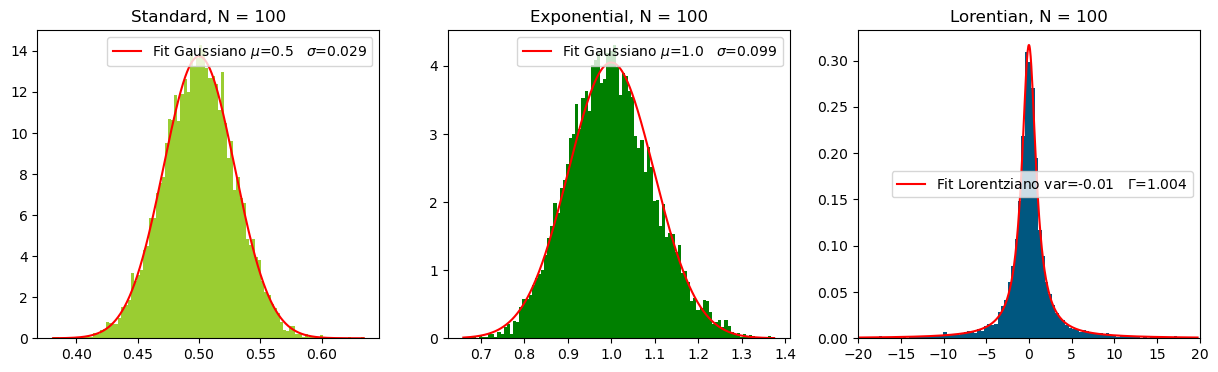

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from scipy.stats import cauchy

N = [1,2,10,100]

for i in range(4):
    stand, exp, lor = np.loadtxt("Files/distr.dat", usecols=(3*i,3*i+1,3*i+2), unpack=True, skiprows=1)
    lor_f = [x for x in lor if abs(x) <= 20]
    fig, (h1, h2, h3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

    h1.hist(stand, bins=100, density=True, color='#9acd32'); h1.set_title("Standard, N = " + str(N[i]))
    h2.hist(exp, bins=100, density=True, color='green'); h2.set_title("Exponential, N = " + str(N[i]))
    h3.hist(lor_f, bins=100, density=True, color="#005780"); h3.set_title("Lorentian, N = " + str(N[i])) 
    h3.set_xlim(-20,20)

    if i==3:
        mu_s, sigma_s = norm.fit(stand)
        mu_e, sigma_e = norm.fit(exp)
        var_fit, gamma_fit = cauchy.fit(lor)

        x_fit = np.linspace(min(stand), max(stand), 1000)
        z_fit = np.linspace(min(exp), max(exp), 1000)
        w_fit = np.linspace(min(lor_f), max(lor_f), 1000)

        h1.plot(x_fit, norm.pdf(x_fit, mu_s, sigma_s), 'r-', label=r"Fit Gaussiano $\mu$="+ str(round(mu_s, 3)) + r"   $\sigma$=" + str(round(sigma_s, 3))); 
        h1.legend()

        h2.plot(z_fit, norm.pdf(z_fit, mu_e, sigma_e), 'r-', label=r"Fit Gaussiano $\mu$="+ str(round(mu_e, 3)) + r"   $\sigma$=" + str(round(sigma_e, 3))); 
        h2.legend()
        
        h3.plot(w_fit, cauchy.pdf(w_fit, loc=var_fit, scale=gamma_fit), 'r-', label=r"Fit Lorentziano var="+ str(round(var_fit, 3)) + r"   $\Gamma$=" + str(round(gamma_fit, 3))); 
        h3.legend()

Nel caso della distribuzione uniforme e quella esponenziale, come ci si poteva aspettare la media di un numero crescente di campioni indipendenti assume progressivamente una forma sempre più simile ad una gaussiana, come previsto dal CLT. 

Al contrario la somma di numeri distribuiti secondo una Cauchy-Lorentz non converge ad una gaussiana ma resta sempre una una lorentziana. Questo accade perché la distribuzione di Cauchy-Lorentz ha:
 * una media indefinita, dato che l'integrale $\mu = \int_{-\infty}^{+\infty} xp(x)dx$ non converge
 * una varianza infinita, dato che l'integrale per $\langle x^2 \rangle -{\langle x \rangle}^2 $ diverge   

Dunque non soddisfa le richieste per l'applicazione del CLT e la distribuzione risultante non tende a una gaussiana, rimanendo una Cauchy-Lorentz (stabile, ma non gaussiana).

### **Esercizio 1.3 - L'esperimento di Buffon**
L’esperimento di Buffon è un metodo per stimare il valore di $\pi$ attraverso una procedura probabilistica. Si immagina di avere un piano rigato da linee parallele equidistanti di distanza $d$, su cui vengono lasciati cadere aghi di lunghezza $l\leq d$. Calcolando la frequenza con cui gli aghi intersecano le linee, è possibile stimare $\pi$ usando la formula:
$$
\pi = \frac{2lN_{throw}}{dN_{hit}}
$$

Il programma che ho scritto effettua $M=10^6$ lanci di aghi suddivisi in $N=100$ blocchi e per ciascun blocco calcola una stima indipendente di $\pi$, infine esegue la media progressiva e il relativo errore statistico.

Il calcolo di $\pi$ viene fatto tramite la formula sopra, dove l'intersezione dell'ago con la griglia è verificata tramite la funzione:
```cpp
    bool Intersect(double l, double d, double ang, Random& rnd){
        double y = (l/2) * sin(ang); // Calcola la coordinata y del punto di intersezione
        double x = rnd.Rannyu() * d; // Genera un punto casuale lungo la distanza d
        return y >= min(x, d - x);   // Se la coordinata y è >= alla distanza tra x e d ==> intersezione avviene
    }
```

L’andamento della stima mostra una convergenza verso $\pi$ all’aumentare del numero di lanci, come evidenziato dal grafico della media progressiva, sotto riportato.

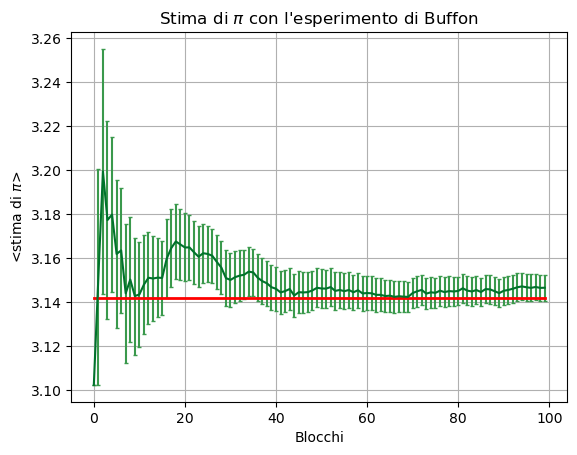

In [4]:
import matplotlib.pyplot as plt
import numpy as np

N=100
L=1000
x = np.arange(N)
pi=np.full_like(x,np.pi, dtype=float)

av, err = np.loadtxt("Files/pi.dat", usecols=(0,1), delimiter='\t', unpack='True')

plt.errorbar(x,av,yerr=err,color='#00722B', ecolor='#3A994C', capsize=1.5)
plt.plot(x,pi, color='r', linewidth=2)
plt.xlabel('Blocchi')
plt.ylabel(r'<stima di $\pi$>')
plt.title(r"Stima di $\pi$ con l'esperimento di Buffon")
plt.grid(True)
plt.show()